In [2]:
import pandas as pd 

dataset = pd.read_excel("HP.xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
import pandas as pd

dataset = pd.read_excel("HP.xlsx")

dataset.shape

(2919, 13)

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols) )

int = (dataset.dtypes == 'int')
num_cols = list(int[int].index)
print("Integer variables:",len(num_cols))


fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

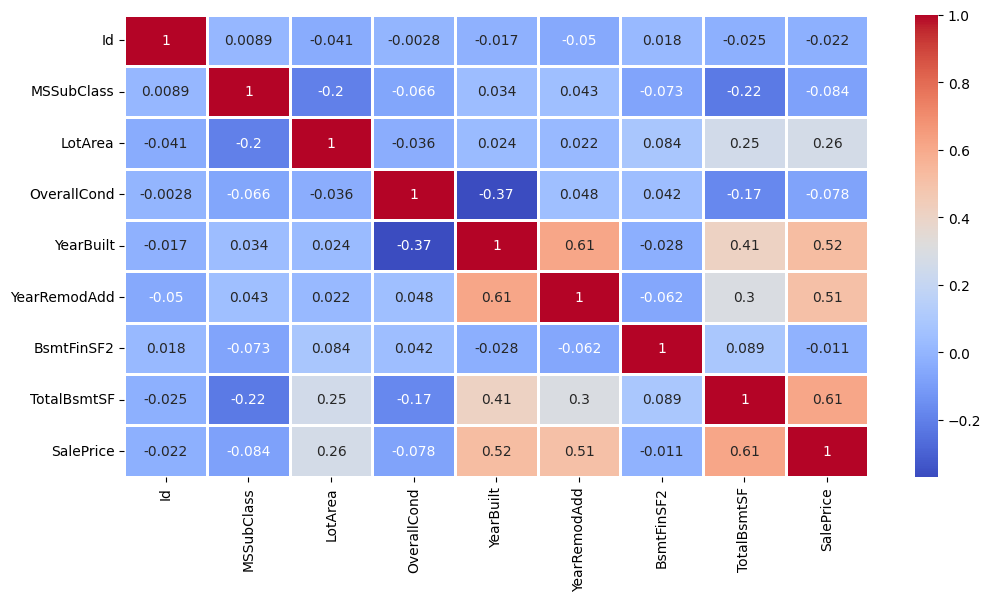

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
num_dat = dataset.select_dtypes(include=['number'])


plt.figure(figsize=(12,6))
sns.heatmap(num_dat.corr(), annot=True, cmap='coolwarm',linewidths=2)


<Axes: title={'center': 'No. of Unique values'}>

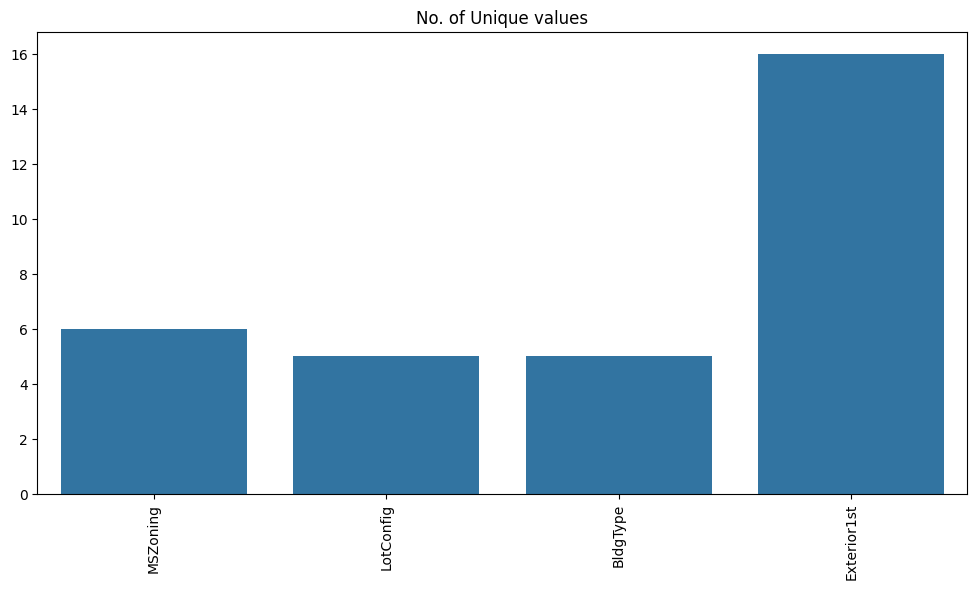

In [6]:
uv = []

for c in object_cols:
    uv.append(dataset[c].unique().size)
plt.figure(figsize=(12,6))
plt.title("No. of Unique values")
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=uv)

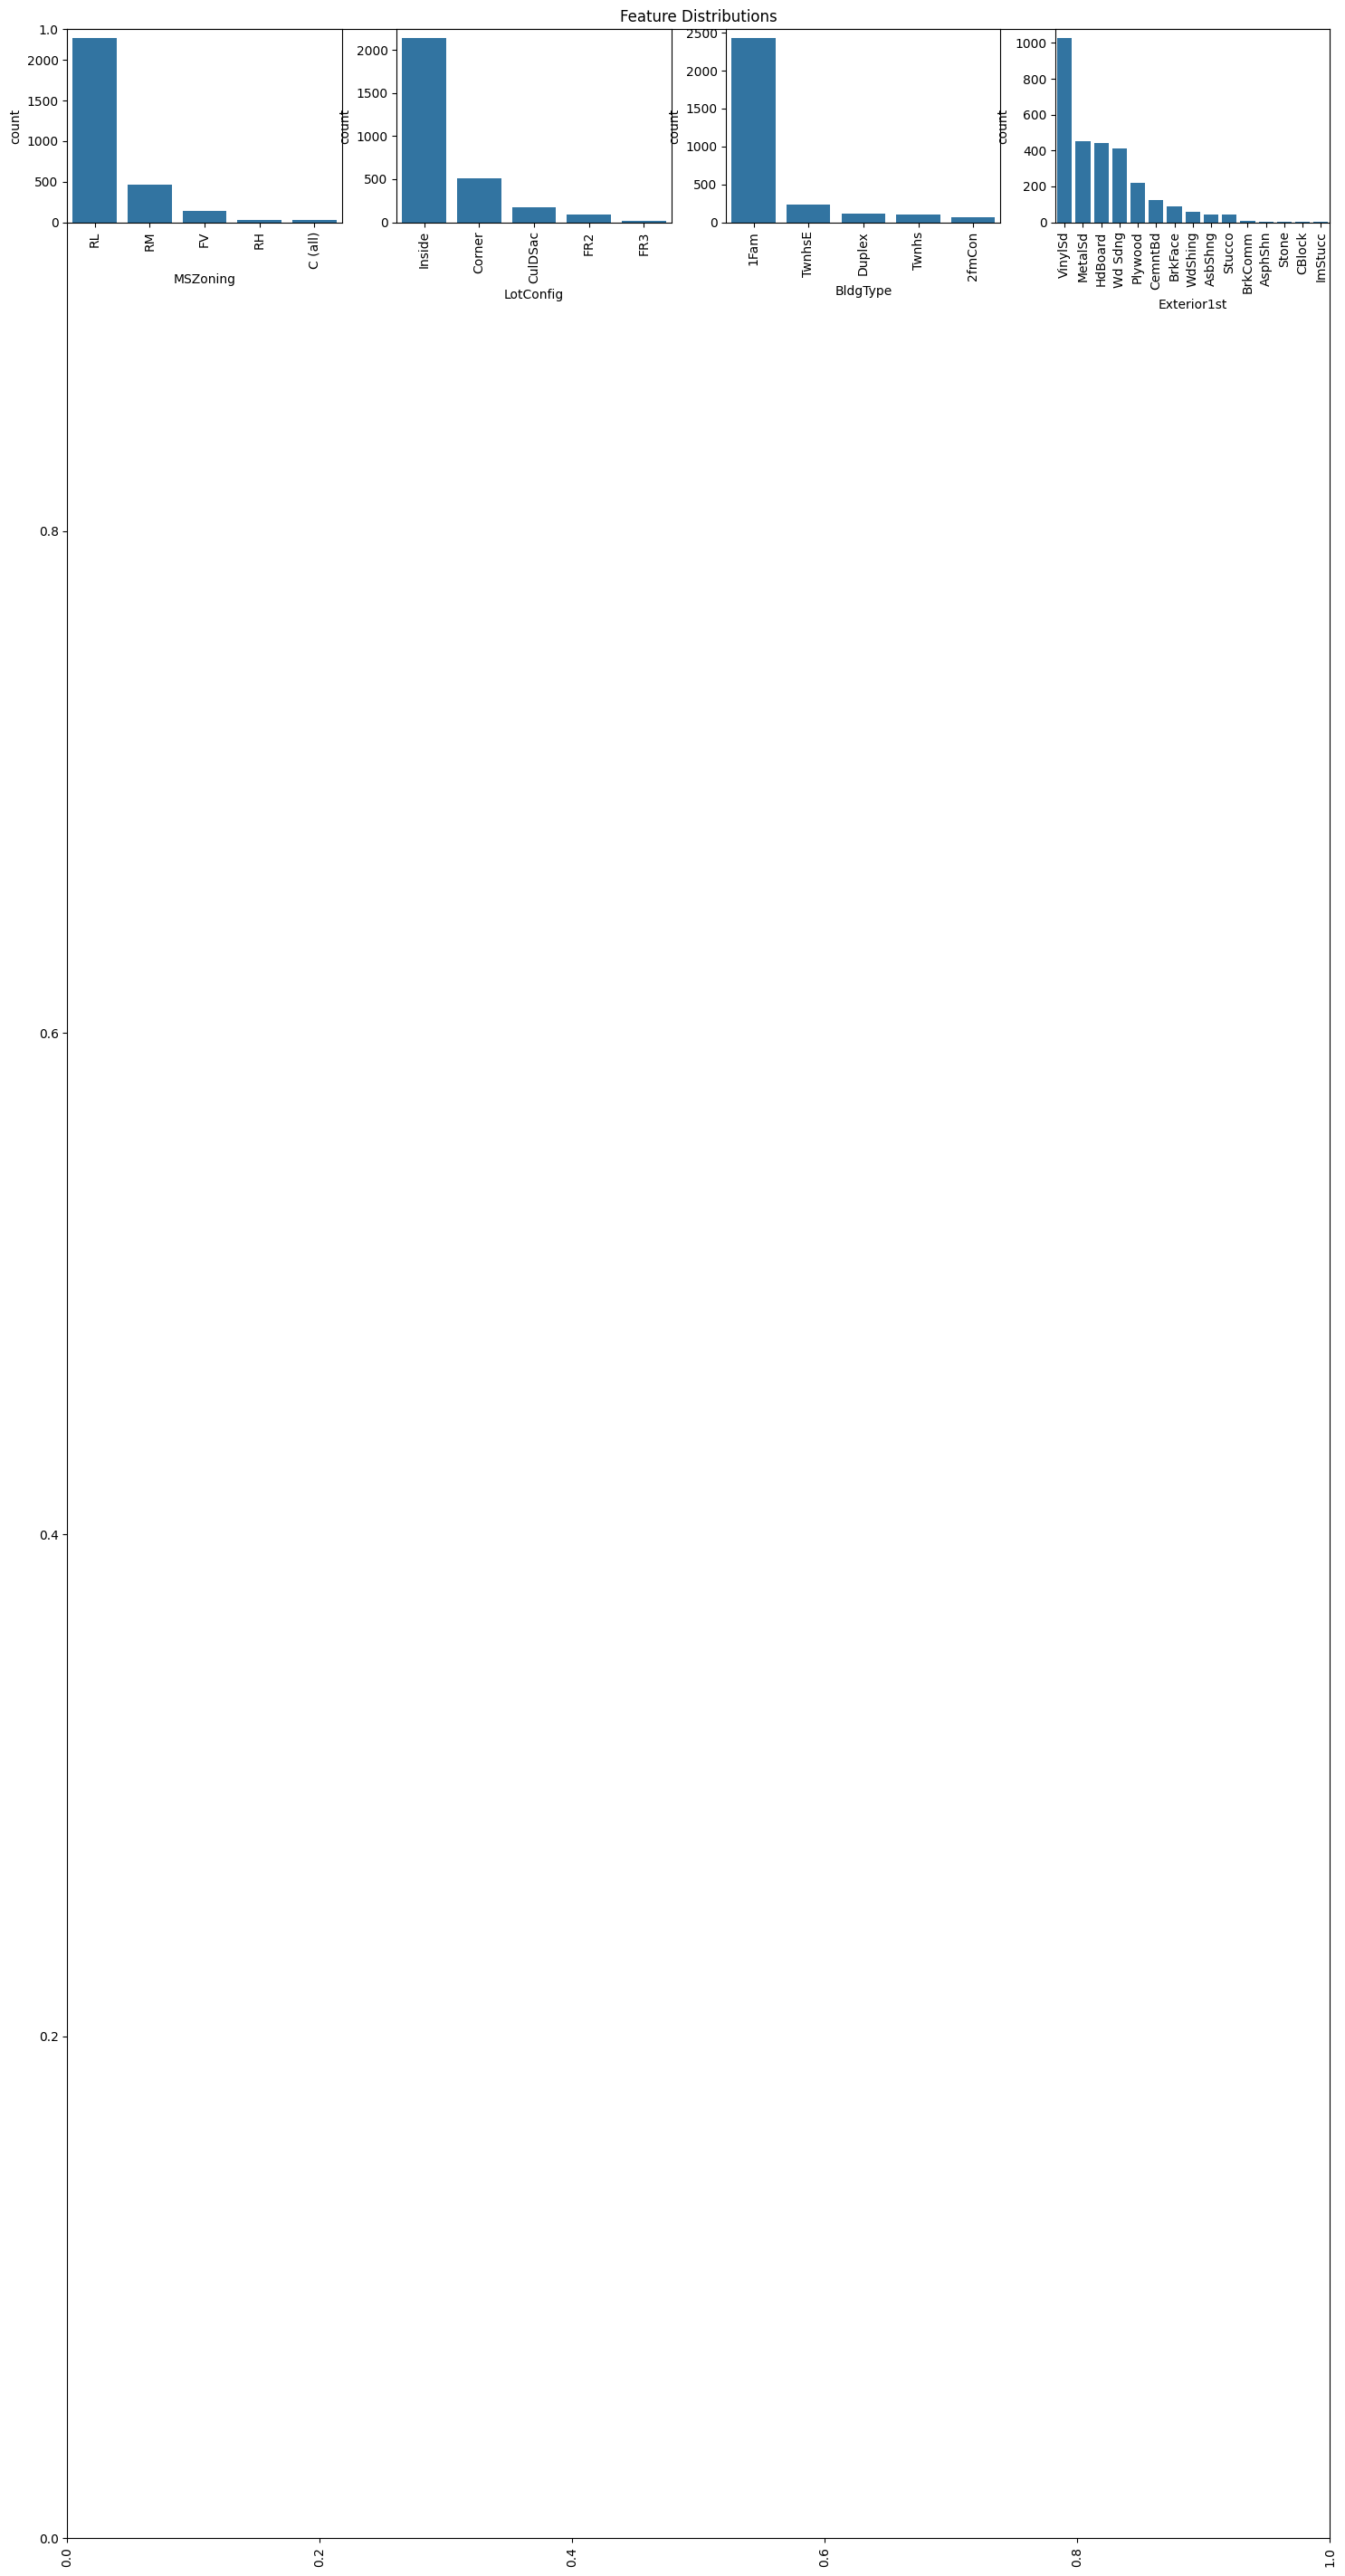

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))
plt.title("Feature Distributions")
plt.xticks(rotation=90)
index = 1

for c in object_cols:
    y = dataset[c].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=y.index, y=y)
    index += 1



In [8]:
# Data Cleaning and Preprocessing

dataset.drop(["Id"],axis=1,inplace=True)


In [9]:
dataset["SalePrice"] = dataset["SalePrice"].fillna(dataset["SalePrice"].mean())

In [10]:
new_dataset = dataset.dropna()

In [11]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("categorical variables:")
print(object_cols)
print("No. of categorical variables:",len(object_cols) )

categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical variables: 4


In [18]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
print(OH_encoder)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
print(OH_cols)
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
print(OH_cols.columns)
df_final = new_dataset.drop(object_cols, axis=1)
print(df_final)
df_final = pd.concat([df_final, OH_cols], axis=1)
print(df_final)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)
       0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2908  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
2909  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
2910  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2911  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
2912  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   

   

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(["SalePrice"], axis=1)
Y = df_final["SalePrice"]

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

In [15]:

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [16]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18639844348496828

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.187416838415999
